## Task 3: Unsupervised Machine Learning
* Aim: To predict the optimum number of clusters and represent it visually from the given 'Iris Dataset' 
* Programming Language used: Python 3
* Data source: https://bit.ly/3kXTdox

### Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline
sns.set()

### Load the data set

In [2]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
print("Data is imported successfully")

Data is imported successfully


### View the dataset

In [3]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Describe the dataset

In [4]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualize the relationship between features

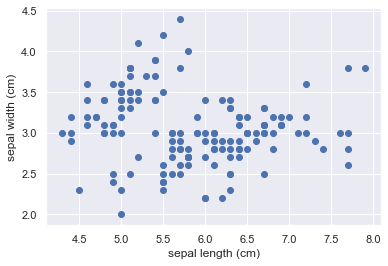

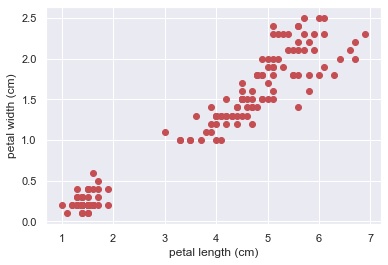

In [5]:
plt.scatter(x = 'sepal length (cm)', y = 'sepal width (cm)', data = iris_data)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

plt.scatter(x = 'petal length (cm)', y = 'petal width (cm)', data = iris_data, color='r')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

### Using Elbow method to find k

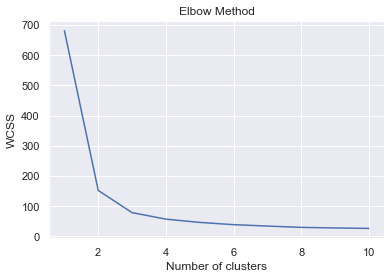

In [6]:
#WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(iris_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### K=3 clusters

In [7]:
kmeans_3=KMeans(3)
kmeans_3.fit(iris_data)

iris_pred_3=iris_data.copy()
iris_pred_3['predicted']=kmeans_3.fit_predict(iris_data)

### Visualizing clusters for true label vs predicted values

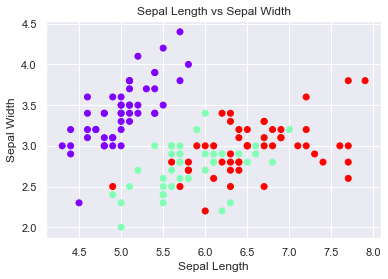

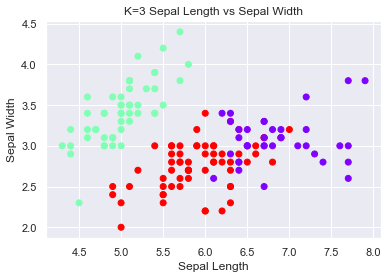

In [12]:
plt.scatter(x='sepal length (cm)', y='sepal width (cm)', c=iris.target, cmap = 'rainbow', data=iris_data)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')
plt.show()

plt.scatter(x='sepal length (cm)', y='sepal width (cm)', c='predicted', cmap = 'rainbow', data=iris_pred_3)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K=3 Sepal Length vs Sepal Width')
plt.show()

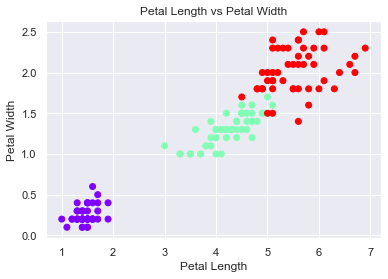

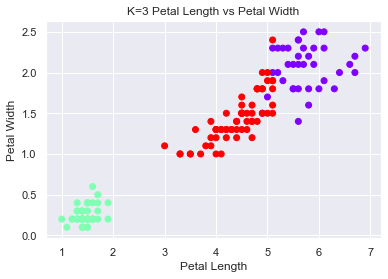

In [10]:
plt.scatter(x='petal length (cm)', y='petal width (cm)', c=iris.target, cmap = 'rainbow', data=iris_data)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')
plt.show()

plt.scatter(x='petal length (cm)', y='petal width (cm)', c='predicted', cmap = 'rainbow', data=iris_pred_3)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('K=3 Petal Length vs Petal Width')
plt.show()